In [1458]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (40,4)
# plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


In [3222]:
## Read Log File
log_dir = 'experiment_agan_70_0_bs1_w40_64res_resize_noisemost128conv_genmask_personpool_noiselabel_gapgfc_lossLL_Limage2_lr0001_cv2_SG'
with open('../checkpoints/'+log_dir+'/loss_log.txt', 'r') as f:
    log = f.read()

## Create directory for saved plots    
if not os.path.exists(log_dir):
    os.makedirs(log_dir)
    
## Save Plots    
SAVE = True

## Max number of plot iterations
MAX_ITER = 1000000000



In [3223]:
llog = log.split('\n')
split_llog = [e.replace('(', '').replace(')', '').replace(',', '').split() for e in llog]
# llog[:3]

In [3224]:
llog[:3]

['================ Training Loss (Fri Jul  9 21:58:10 2021) ================',
 '(epoch: 1, iters: 25, lr: 0.0001000, t_comp: 0.049, t_load: 0.046) G_image: 4.170 G_person: 0.635 G_L1: 43.557 D_image_real: 1.720 D_image_fake: 2.067 D_person_real: 0.001 D_person_fake: 0.043 acc_D_image_real: 0.560 acc_D_image_fake: 0.530 acc_D_person_real: 1.000 acc_D_person_fake: 1.000 grad_G_outer_image: 41.754 grad_G_outer_person: 8.856 grad_G_outer_L1: 152.231 grad_G_outer: 159.636 grad_G_outer_clip: 112.158 grad_G_inner_image: 17.090 grad_G_inner_person: 1.603 grad_G_inner_L1: 2.229 grad_G_inner: 17.236 grad_G_inner_clip: 17.236 grad_G_mid_image: 25.094 grad_G_mid_person: 2.275 grad_G_mid_L1: 3.250 grad_G_mid: 25.426 grad_G_mid_clip: 25.426 ',
 '(epoch: 1, iters: 50, lr: 0.0001000, t_comp: 0.042, t_load: 0.006) G_image: 2.333 G_person: 0.221 G_L1: 20.416 D_image_real: 1.245 D_image_fake: 1.619 D_person_real: 0.004 D_person_fake: 0.327 acc_D_image_real: 0.530 acc_D_image_fake: 0.470 acc_D_person_rea

In [3225]:
# Create list of keys from log data
keys = [k.replace(':','') for k in split_llog[1] if ':' in k]
print('logged data:')
print(keys)

# Create empty dict for log data
log_dict = {k:[] for k in keys}
log_dict['i'] = []


# Populate log dict
count = 0
for entry in split_llog:
#     print(entry)
    if entry and entry[0] == 'epoch:' and count < MAX_ITER:
        log_dict['i'].append(count)
        count += 1
        key = ''
        for e in entry:
            if e[:-1] in keys:
                key = e[:-1]
            else:
                data = float(e) if '.' in e else int(e)
                log_dict[key].append(data)


# print(log_dict)

    

logged data:
['epoch', 'iters', 'lr', 't_comp', 't_load', 'G_image', 'G_person', 'G_L1', 'D_image_real', 'D_image_fake', 'D_person_real', 'D_person_fake', 'acc_D_image_real', 'acc_D_image_fake', 'acc_D_person_real', 'acc_D_person_fake', 'grad_G_outer_image', 'grad_G_outer_person', 'grad_G_outer_L1', 'grad_G_outer', 'grad_G_outer_clip', 'grad_G_inner_image', 'grad_G_inner_person', 'grad_G_inner_L1', 'grad_G_inner', 'grad_G_inner_clip', 'grad_G_mid_image', 'grad_G_mid_person', 'grad_G_mid_L1', 'grad_G_mid', 'grad_G_mid_clip']


In [3226]:
count

3360

In [3227]:
# log_dict['iters'] = [int(x/32) for x in log_dict['iters']]
# log_dict['iters'][:5]

---

## G_image loss plot

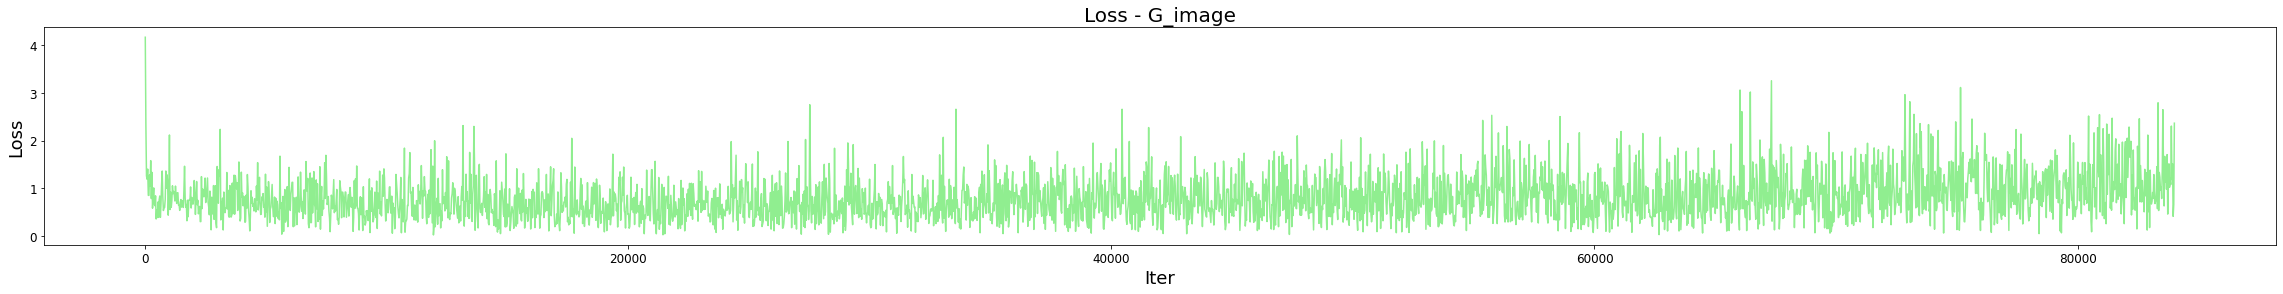

In [3228]:
# Data for plotting
x = log_dict['iters']
try:
    y = log_dict['G_image']
except:
    y = log_dict['G_GAN_image']
fig, ax = plt.subplots()
ax.plot(x, y, 'lightgreen')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - G_image')
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_G_image.png")
plt.show()



## D_image_fake loss plot

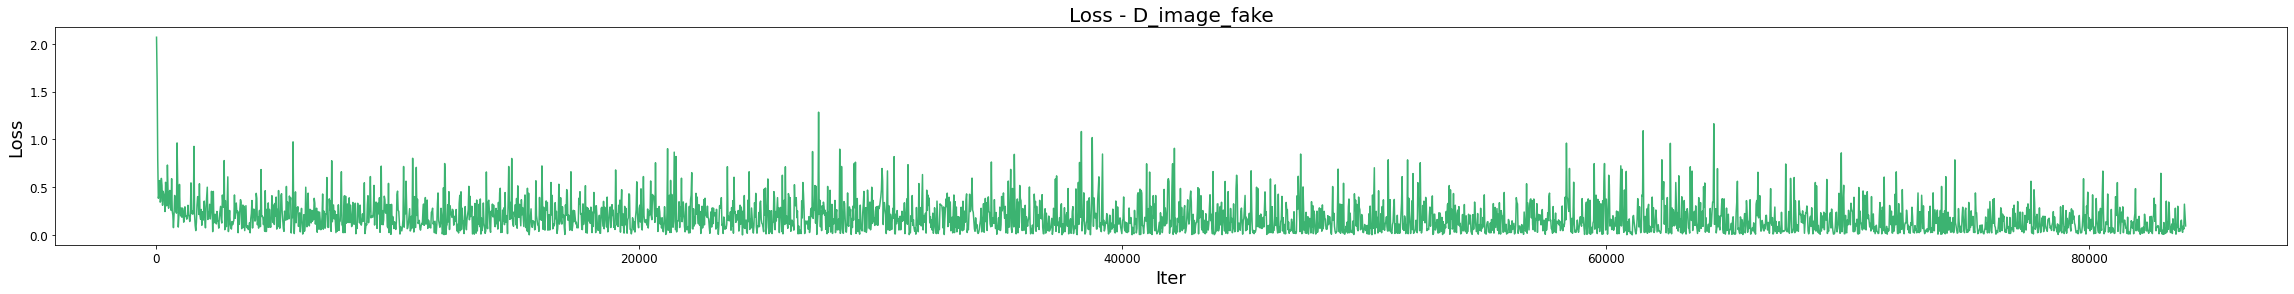

In [3229]:
# Data for plotting
x = log_dict['iters']
y = log_dict['D_image_fake']
fig, ax = plt.subplots()
ax.plot(x, y, 'mediumseagreen')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - D_image_fake')
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_D_image_fake.png")
plt.show()

## D_image_real loss plot

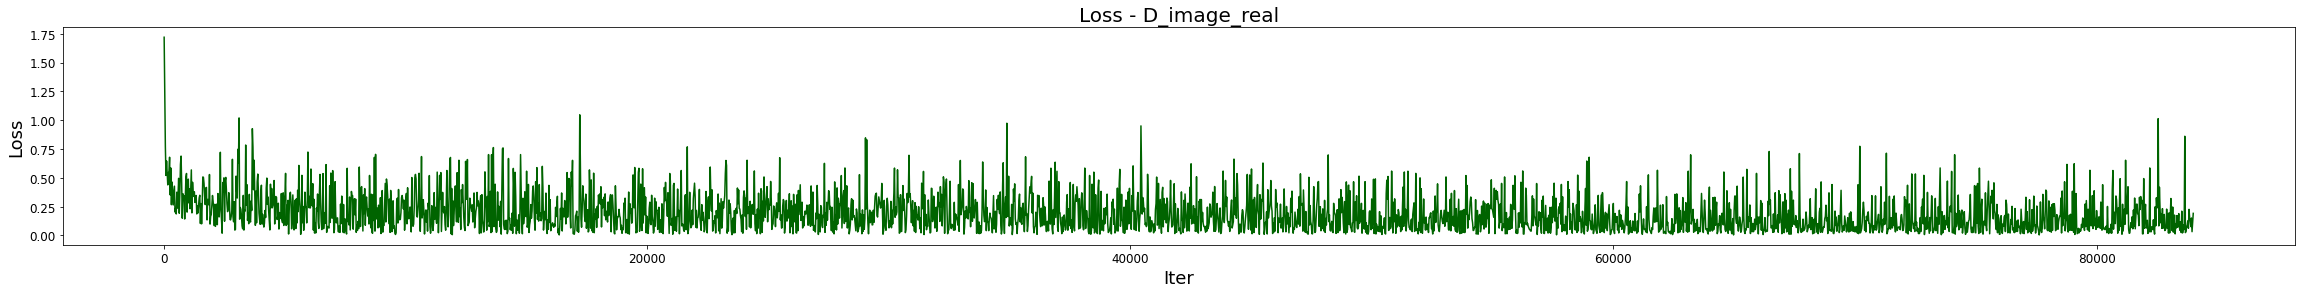

In [3230]:
# Data for plotting
x = log_dict['iters']
y = log_dict['D_image_real']
fig, ax = plt.subplots()
# ax.plot(x, y, 'forestgreen')
ax.plot(x, y, 'darkgreen')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - D_image_real')
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_D_image_real.png")
plt.show()

---
---
## G_L1 loss plot

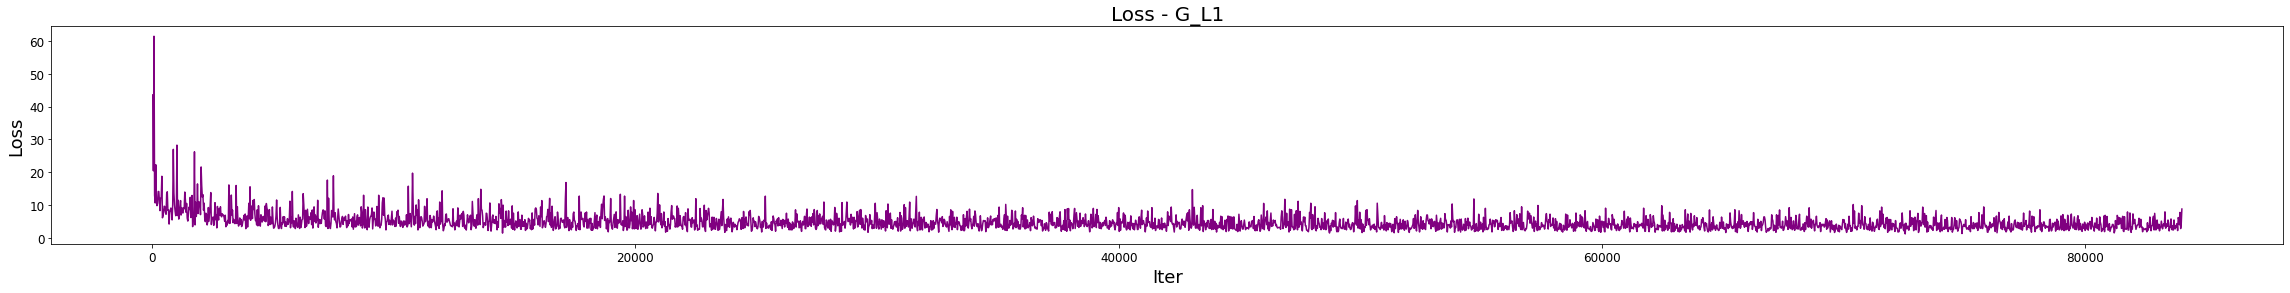

In [3231]:
# Data for plotting
x = log_dict['iters']
y = log_dict['G_L1']
fig, ax = plt.subplots()
ax.plot(x, y, 'purple')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - G_L1')
# plt.ylim(0, 14)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_G_L1.png")
plt.show()

---
---
## G_person loss plot

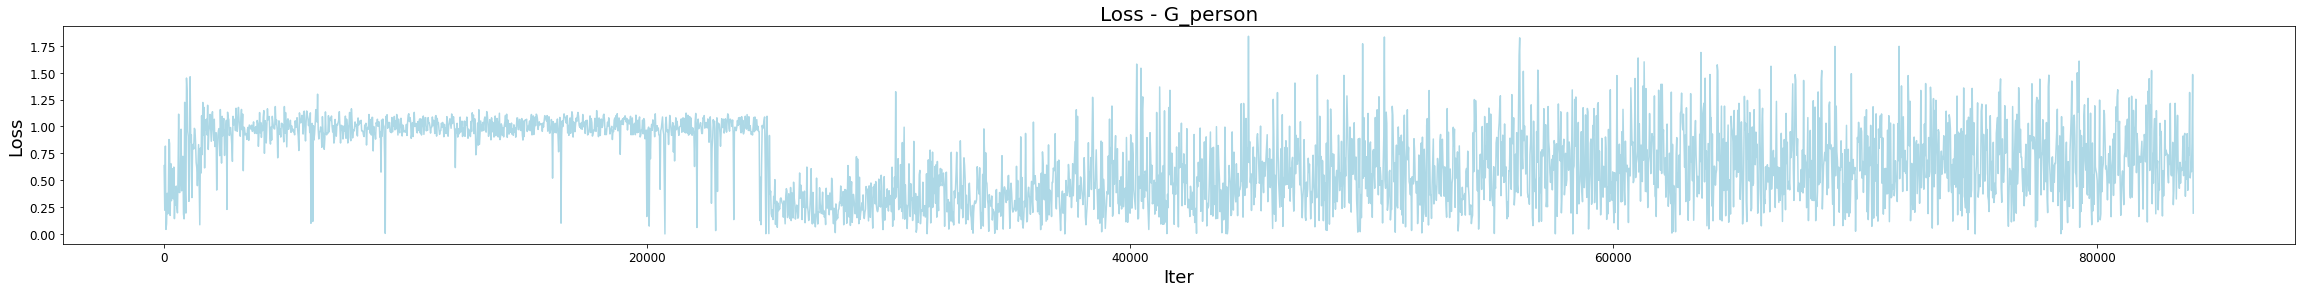

In [3232]:
# Data for plotting
x = log_dict['iters']
try:
    y = log_dict['G_person']
except:
    y = log_dict['G_GAN_person']
fig, ax = plt.subplots()
ax.plot(x, y, 'lightblue')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - G_person')

# plt.ylim(0, 3)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_G_person.png")
plt.show()

## D_person_fake loss plot

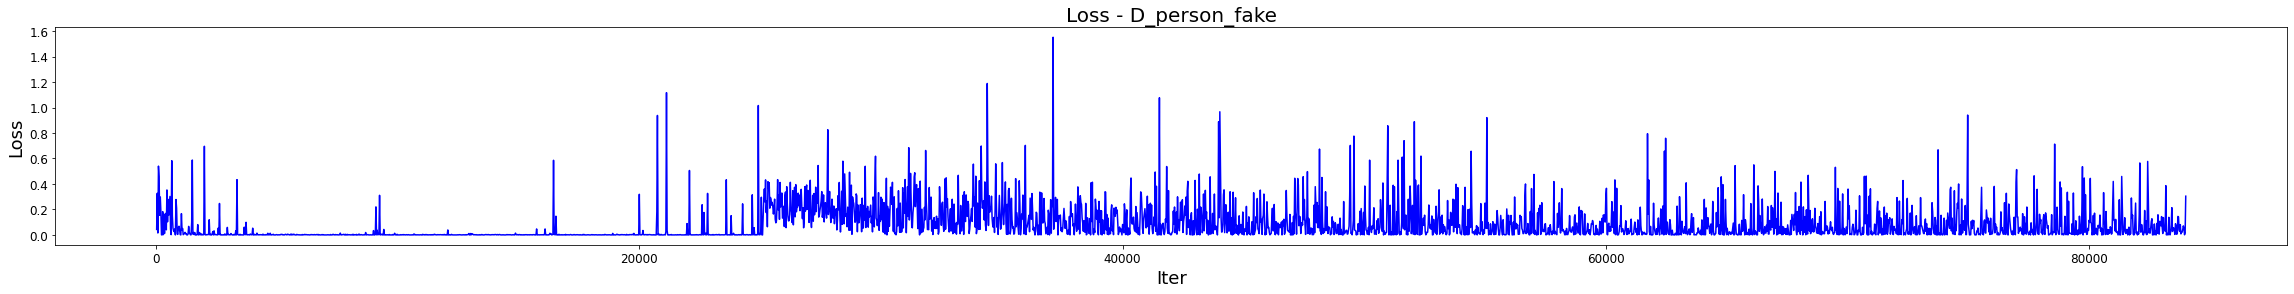

In [3233]:
# Data for plotting
x = log_dict['iters']
y = log_dict['D_person_fake']
# print(x)
# print(y)
fig, ax = plt.subplots()
ax.plot(x, y, 'blue')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - D_person_fake')
# plt.ylim(0, 3)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_D_person_fake.png")
plt.show()

## D_person_real plot

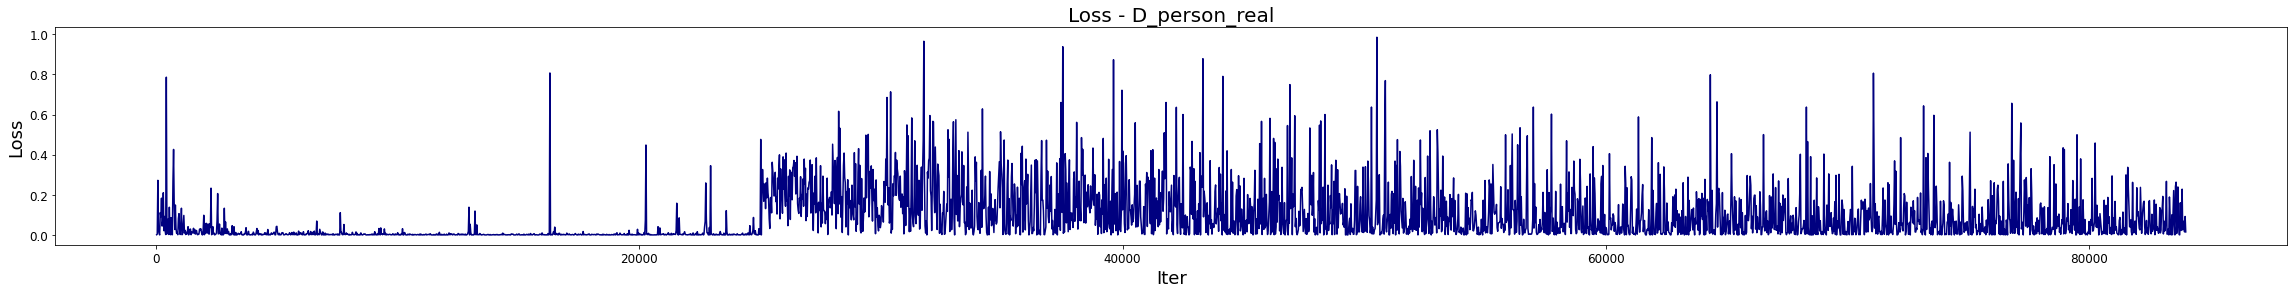

In [3234]:
# Data for plotting
x = log_dict['iters']
y = log_dict['D_person_real']
# print(x)
# print(y)
fig, ax = plt.subplots()
ax.plot(x, y, 'navy')

ax.set(xlabel='Iter', ylabel='Loss',
       title='Loss - D_person_real')
# plt.ylim(0, 3.5)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_loss_D_person_real.png")
plt.show()

## Learning Rate

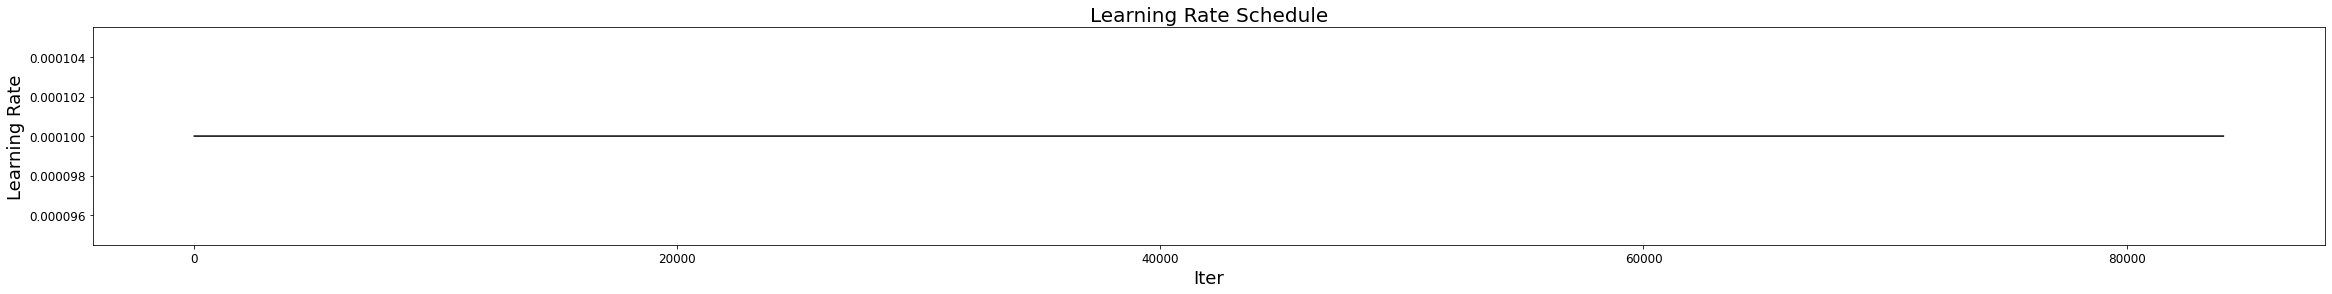

In [3235]:
# Data for plotting
x = log_dict['iters']
y = log_dict['lr']
fig, ax = plt.subplots()
ax.plot(x, y, 'black')

ax.set(xlabel='Iter', ylabel='Learning Rate',
       title='Learning Rate Schedule')
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_learning_rate.png")
plt.show()

---
---
## Accuracy Plot - D Image Fake

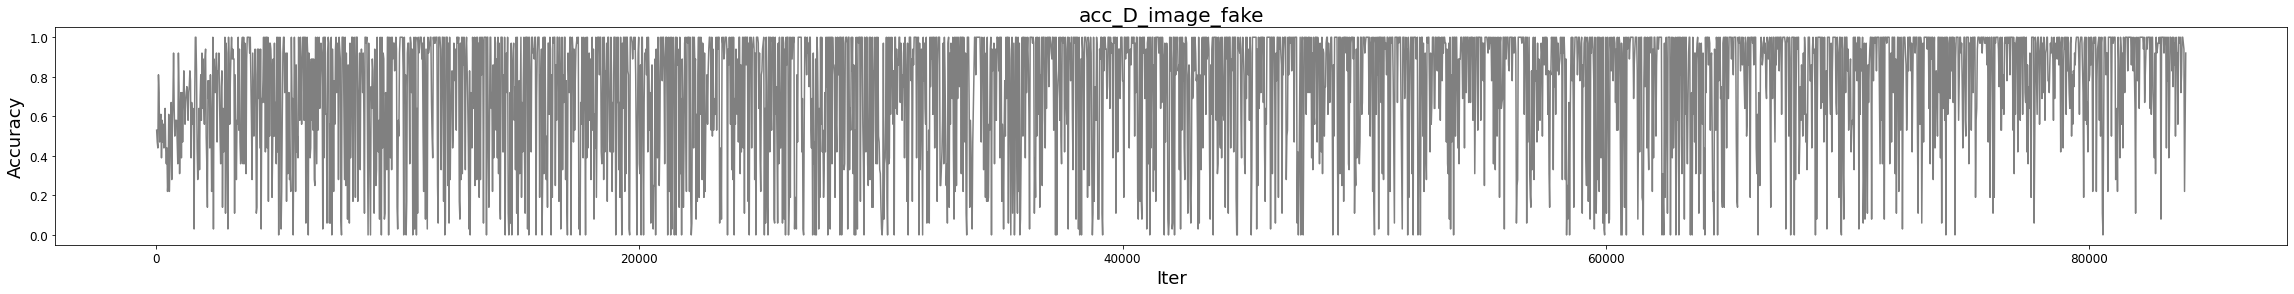

In [3236]:
# Data for plotting
data_name = 'acc_D_image_fake'
x = log_dict['iters']
y = log_dict[data_name]
fig, ax = plt.subplots()
ax.plot(x, y, 'grey')

ax.set(xlabel='Iter', ylabel='Accuracy',
       title=data_name)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_"+data_name+".png")
plt.show()

## Accuracy Plot - D Image Real

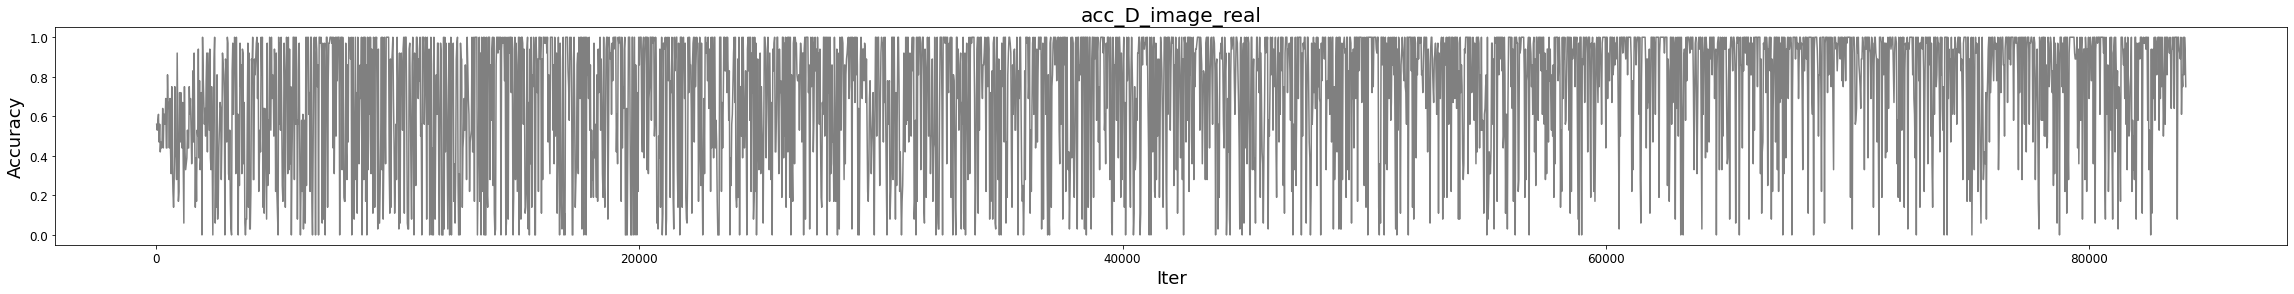

In [3237]:
# Data for plotting
data_name = 'acc_D_image_real'
x = log_dict['iters']
y = log_dict[data_name]
fig, ax = plt.subplots()
ax.plot(x, y, 'grey')

ax.set(xlabel='Iter', ylabel='Accuracy',
       title=data_name)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_"+data_name+".png")
plt.show()

## Accuracy Plot - D Person Fake

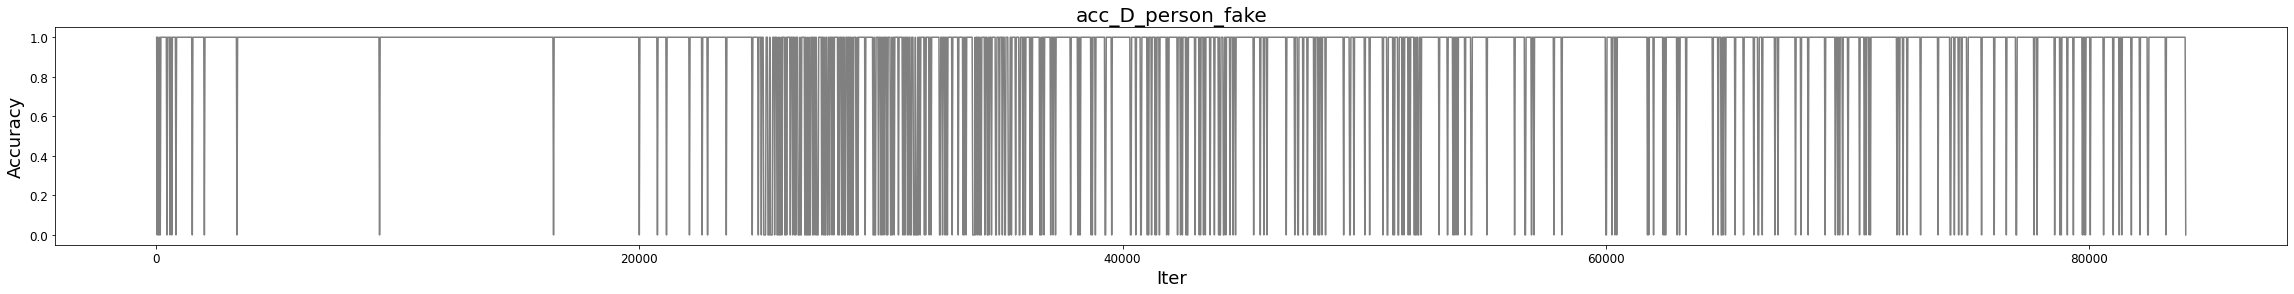

In [3238]:
# Data for plotting
data_name = 'acc_D_person_fake'
x = log_dict['iters']
y = log_dict[data_name]
fig, ax = plt.subplots()
ax.plot(x, y, 'grey')

ax.set(xlabel='Iter', ylabel='Accuracy',
       title=data_name)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_"+data_name+".png")
plt.show()

## Accuracy Plot - D Person Real

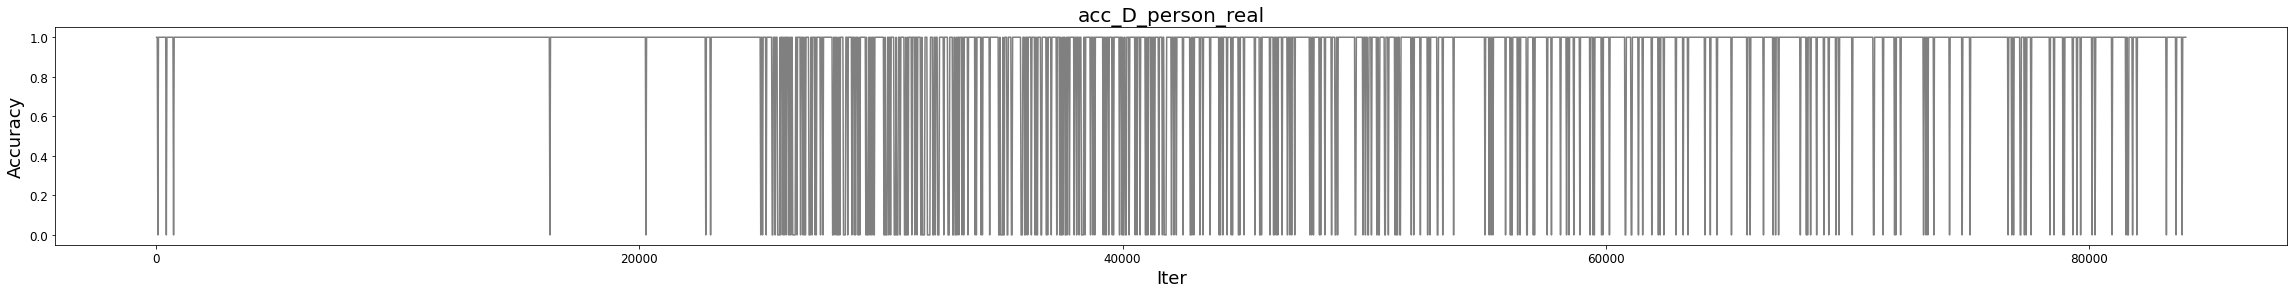

In [3239]:
# Data for plotting
data_name = 'acc_D_person_real'
x = log_dict['iters']
y = log_dict[data_name]
fig, ax = plt.subplots()
ax.plot(x, y, 'grey')

ax.set(xlabel='Iter', ylabel='Accuracy',
       title=data_name)

if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_"+data_name+".png")
plt.show()

---
# Gradient Data

## Gradients -- OUTER layer of generator

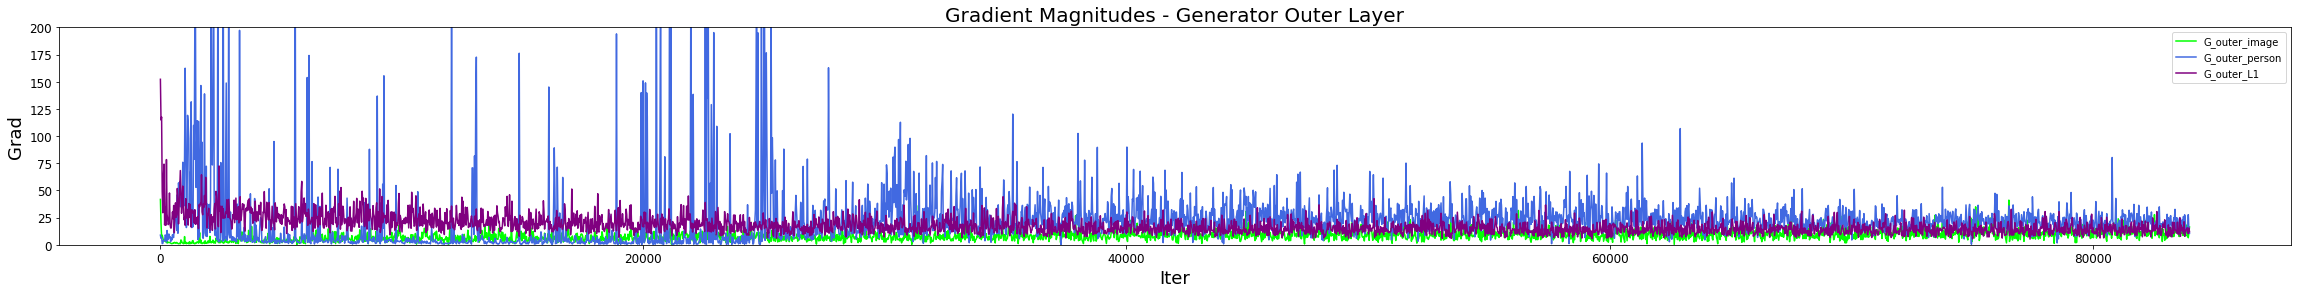

In [3240]:
# Data for plotting
x = log_dict['iters']
# data_name = 'grad_G_image', 'grad_G_person', 'grad_G_L1', 'grad_G', 'grad_G_clip'
y0 = log_dict['grad_G_outer_image']
y1 = log_dict['grad_G_outer_person']
y2 = log_dict['grad_G_outer_L1']

fig, ax = plt.subplots()
ax.plot(x, y0, label = "G_outer_image", color='lime')
ax.plot(x, y1, label = "G_outer_person", color='royalblue')
ax.plot(x, y2, label = "G_outer_L1", color='purple')

ax.set(xlabel='Iter', ylabel='Grad',
       title='Gradient Magnitudes - Generator Outer Layer')
plt.ylim(0,200)
plt.legend()
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_generator_outer_gradients" + ".png")
plt.show()

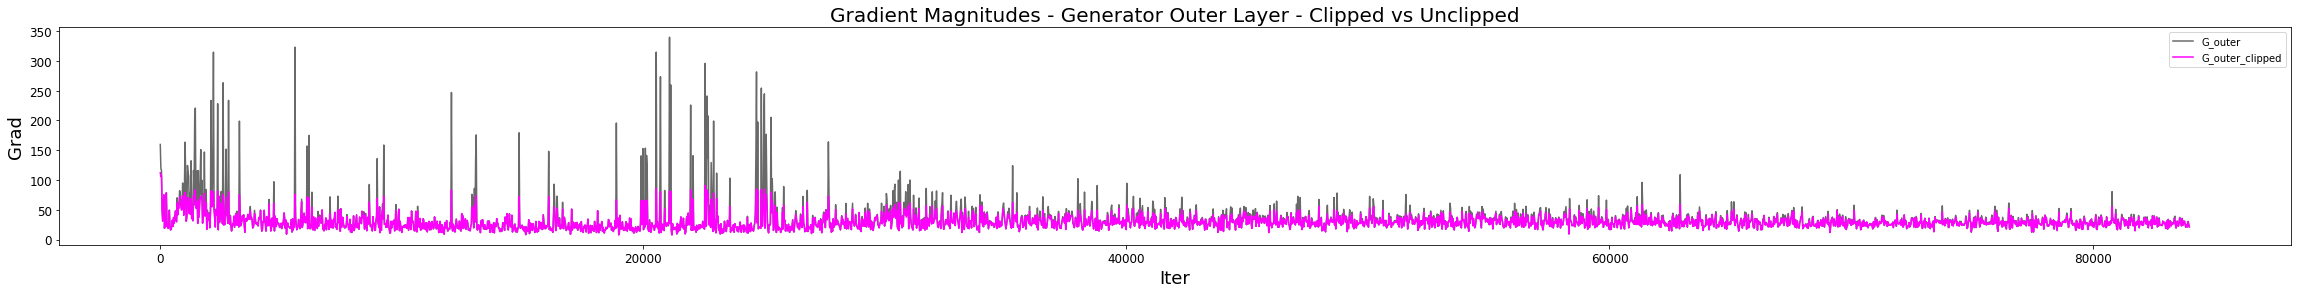

In [3241]:
# Data for plotting
x = log_dict['iters']# data_name = 'grad_G_image', 'grad_G_person', 'grad_G_L1', 'grad_G', 'grad_G_clip'
y0 = log_dict['grad_G_outer']
y1 = log_dict['grad_G_outer_clip']

fig, ax = plt.subplots()
ax.plot(x, y0, label = "G_outer", color='dimgrey')
ax.plot(x, y1, label = "G_outer_clipped", color='magenta')

ax.set(xlabel='Iter', ylabel='Grad',
       title='Gradient Magnitudes - Generator Outer Layer - Clipped vs Unclipped')
# plt.ylim(0, 200)
plt.legend()
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_generator_outer_gradients_clip" + ".png")
plt.show()

## Gradients -- MIDDLE layer of generator

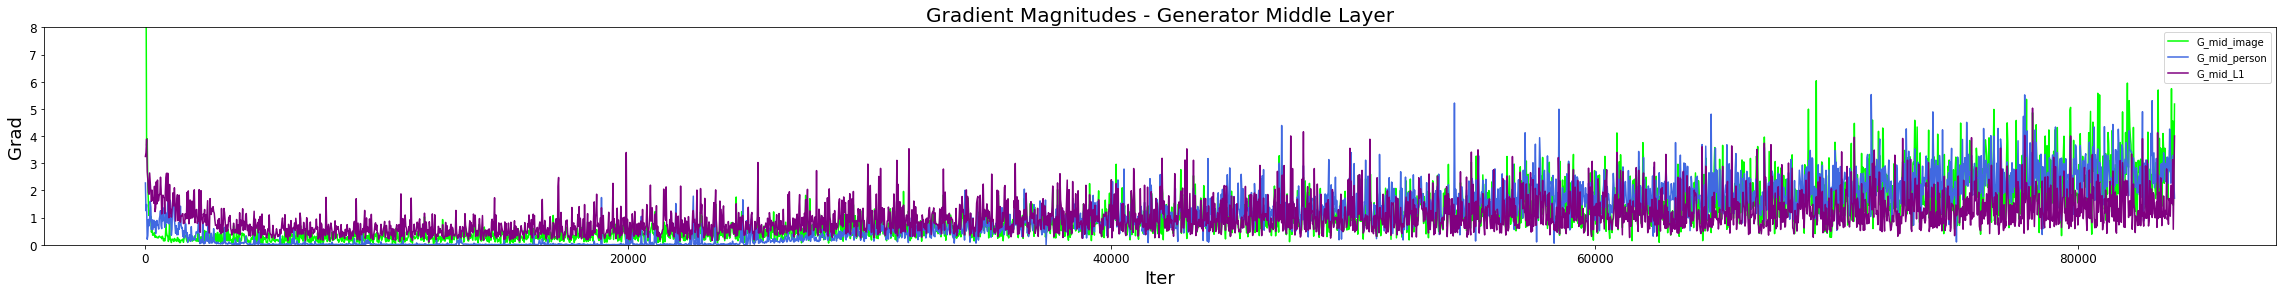

In [3242]:
# Data for plotting
x = log_dict['iters']
# data_name = 'grad_G_image', 'grad_G_person', 'grad_G_L1', 'grad_G', 'grad_G_clip'
y0 = log_dict['grad_G_mid_image']
y1 = log_dict['grad_G_mid_person']
y2 = log_dict['grad_G_mid_L1']

fig, ax = plt.subplots()
ax.plot(x, y0, label = "G_mid_image", color='lime')
ax.plot(x, y1, label = "G_mid_person", color='royalblue')
ax.plot(x, y2, label = "G_mid_L1", color='purple')

ax.set(xlabel='Iter', ylabel='Grad',
       title='Gradient Magnitudes - Generator Middle Layer')
plt.ylim(0, 8)
plt.legend()
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_generator_middle_gradients" + ".png")
plt.show()

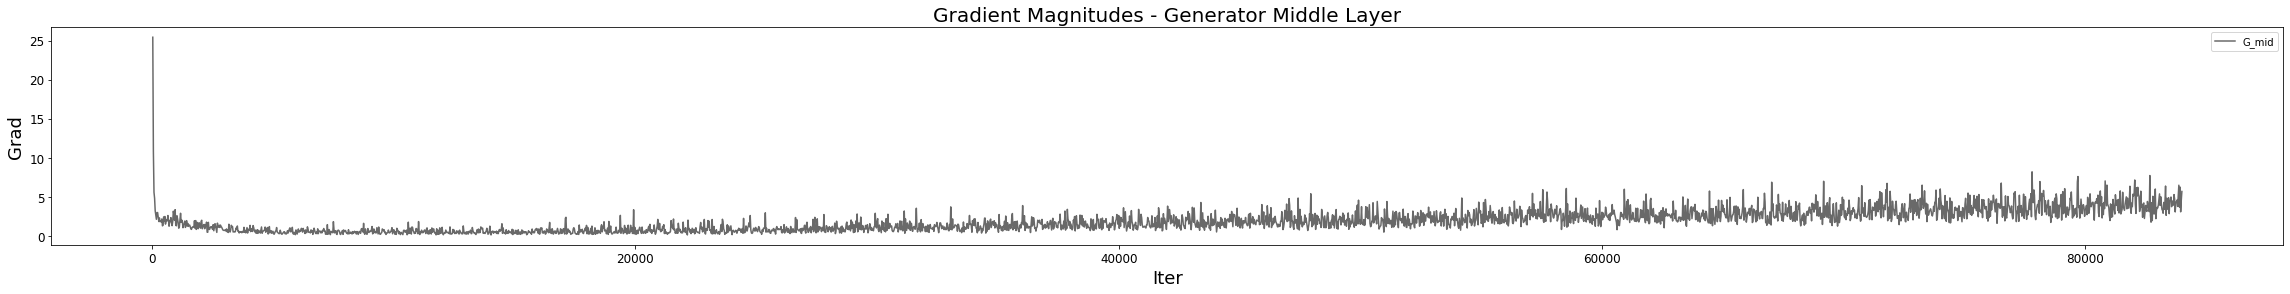

In [3243]:
# Data for plotting
x = log_dict['iters']# data_name = 'grad_G_image', 'grad_G_person', 'grad_G_L1', 'grad_G', 'grad_G_clip'
y0 = log_dict['grad_G_mid']
# y1 = log_dict['grad_G_mid_clip']

fig, ax = plt.subplots()
ax.plot(x, y0, label = "G_mid", color='dimgrey')
# ax.plot(x, y1, label = "G_mid_clipped", color='magenta')

ax.set(xlabel='Iter', ylabel='Grad',
       title='Gradient Magnitudes - Generator Middle Layer')
#plt.ylim(0, 400)
plt.legend()
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_generator_middle_gradients_all" + ".png")
plt.show()

## Gradients -- INNER layer of generator

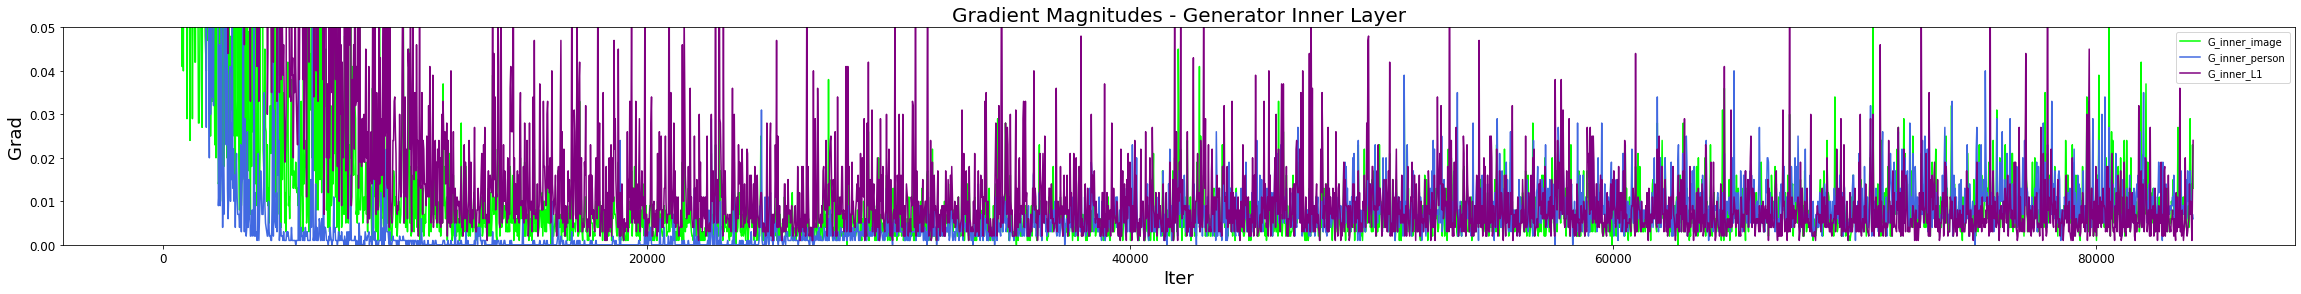

In [3244]:
# Data for plotting
x = log_dict['iters']
# data_name = 'grad_G_image', 'grad_G_person', 'grad_G_L1', 'grad_G', 'grad_G_clip'
y0 = log_dict['grad_G_inner_image']
y1 = log_dict['grad_G_inner_person']
y2 = log_dict['grad_G_inner_L1']

fig, ax = plt.subplots()
ax.plot(x, y0, label = "G_inner_image", color='lime')
ax.plot(x, y1, label = "G_inner_person", color='royalblue')
ax.plot(x, y2, label = "G_inner_L1", color='purple')

ax.set(xlabel='Iter', ylabel='Grad',
       title='Gradient Magnitudes - Generator Inner Layer')
plt.ylim(0, 0.05)
plt.legend()
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_generator_inner_gradients" + ".png")
plt.show()

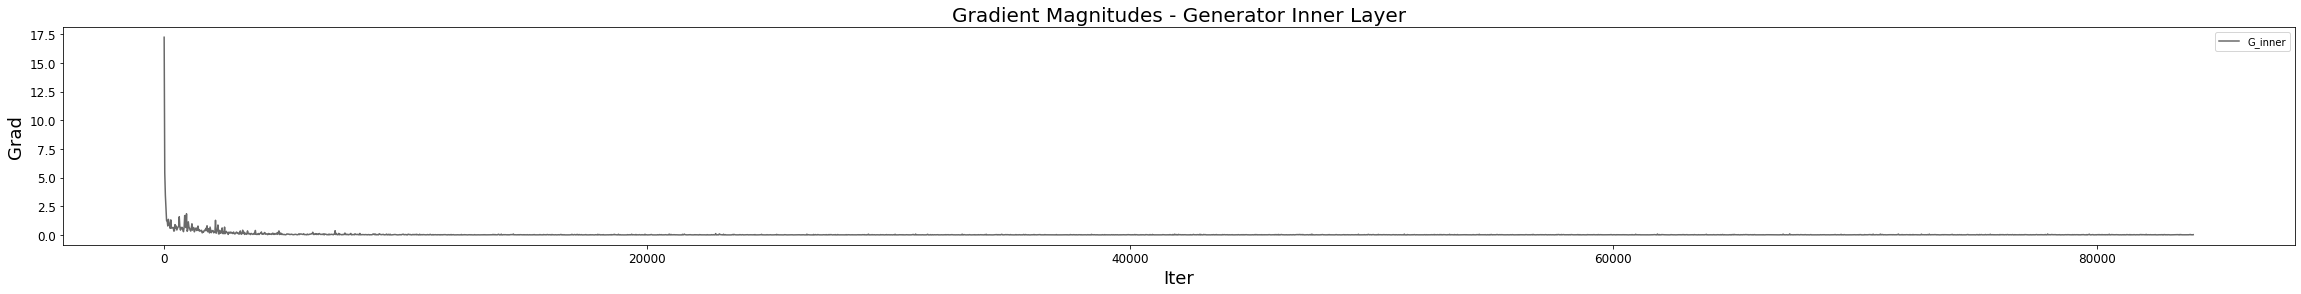

In [3245]:
# Data for plotting
x = log_dict['iters']# data_name = 'grad_G_image', 'grad_G_person', 'grad_G_L1', 'grad_G', 'grad_G_clip'
y0 = log_dict['grad_G_inner']
# y1 = log_dict['grad_G_inner_clip']

fig, ax = plt.subplots()
ax.plot(x, y0, label = "G_inner", color='dimgrey')
# ax.plot(x, y1, label = "G_inner_clipped", color='magenta')

ax.set(xlabel='Iter', ylabel='Grad',
       title='Gradient Magnitudes - Generator Inner Layer')
# plt.ylim(0, 1)
plt.legend()
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_generator_inner_gradients_all" + ".png")
plt.show()

---  
---
# Validation Data

In [3246]:
## Read Log File
with open('../checkpoints/'+log_dir+'/validation_loss_log.txt', 'r') as f:
    validation_log = f.read()

In [3247]:
val_llog = validation_log.split('\n')
val_split_llog = [e.replace('(', '').replace(')', '').replace(',', '').split() for e in val_llog]
val_llog[:10]

['================ Validation Loss (Fri Jul  9 21:58:10 2021) ================',
 '(epoch: 1, iters: 1200, sample: 0, lr: 0.0001000) D_image_real: 0.328 D_image_fake: 0.352 D_person_real: 0.025 D_person_fake: 0.030 acc_D_image_real: 0.500 acc_D_image_fake: 0.530 acc_D_person_real: 1.000 acc_D_person_fake: 1.000 ',
 '(epoch: 1, iters: 1200, sample: 1, lr: 0.0001000) D_image_real: 0.294 D_image_fake: 0.372 D_person_real: 0.101 D_person_fake: 0.016 acc_D_image_real: 0.530 acc_D_image_fake: 0.440 acc_D_person_real: 1.000 acc_D_person_fake: 1.000 ',
 '(epoch: 1, iters: 1200, sample: 2, lr: 0.0001000) D_image_real: 0.296 D_image_fake: 0.390 D_person_real: 0.104 D_person_fake: 0.039 acc_D_image_real: 0.500 acc_D_image_fake: 0.530 acc_D_person_real: 1.000 acc_D_person_fake: 1.000 ',
 '(epoch: 1, iters: 1200, sample: 3, lr: 0.0001000) D_image_real: 0.219 D_image_fake: 0.412 D_person_real: 0.011 D_person_fake: 0.015 acc_D_image_real: 0.720 acc_D_image_fake: 0.420 acc_D_person_real: 1.000 acc_D_p

In [3248]:
# Create list of keys from validation log data
val_keys = [k.replace(':','') for k in val_split_llog[1] if ':' in k]
print('logged data:')
print(val_keys)

standard_keys = ['epoch', 'iters','lr']

# Create empty dict for log data
# val_log_dict = {k:[] for k in val_keys}
# val_log_dict = {k:[[],[],[],[],[]] for k in val_keys}
# val_log_dict = {k:([] if k in standard_keys else [[],[],[],[],[]]) for k in val_keys}
val_log_dict = {k:(set() if k in standard_keys else [[],[],[],[],[]]) for k in val_keys}
val_log_dict['i'] = []


# Populate log dict
count = 0
for entry in val_split_llog:
#     print(entry)
    if entry and entry[0] == 'epoch:' and count < MAX_ITER:
        val_log_dict['i'].append(count)
        count += 1
        key = ''
        next_sample = False  ## if next data indicates which image sample
        standard_key = False
        for e in entry:
            if e[:-1] in val_keys:
                key = e[:-1]
                if key == 'sample':
                    next_sample = True
                else:
                    next_sample = False
                if key in standard_keys:
                    standard_key = True
                else:
                    standard_key = False
            else:
                data = float(e) if '.' in e else int(e)    
                if next_sample == True:
                    img_sample = data
                if standard_key == True:
                    val_log_dict[key].add(data)
                else:
                    val_log_dict[key][img_sample].append(data)

# print()
# print(val_log_dict.keys())

logged data:
['epoch', 'iters', 'sample', 'lr', 'D_image_real', 'D_image_fake', 'D_person_real', 'D_person_fake', 'acc_D_image_real', 'acc_D_image_fake', 'acc_D_person_real', 'acc_D_person_fake']


## D_image_fake loss plot - VALIDATION

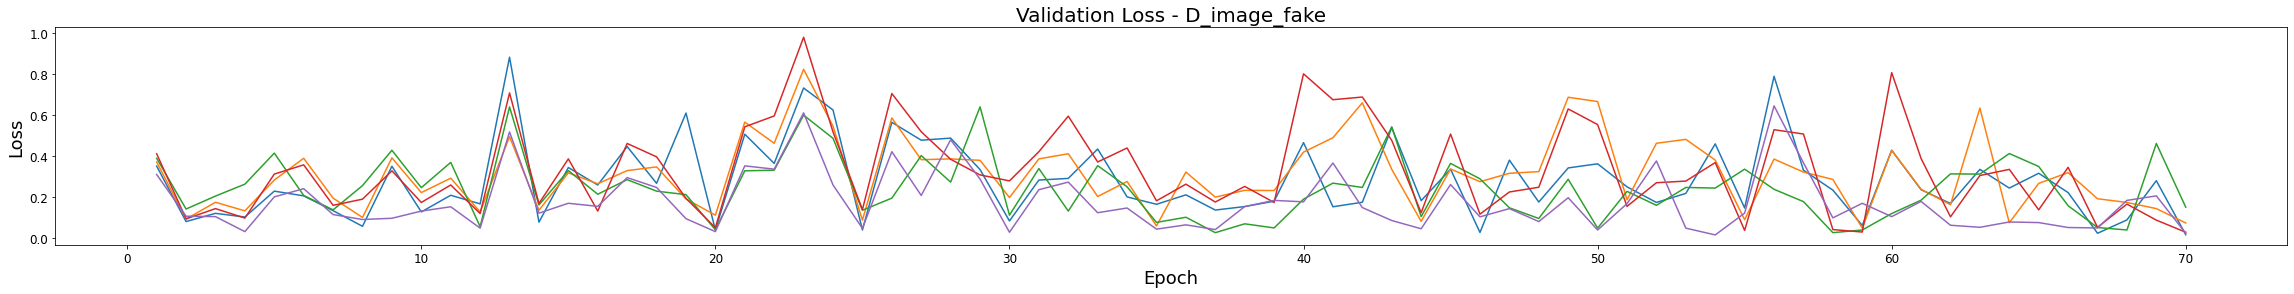

In [3249]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'D_image_fake'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Loss',
       title='Validation Loss - ' + data_name)
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_validation_loss_" + data_name + ".png")
plt.show()

## D_image_real loss plot - VALIDATION

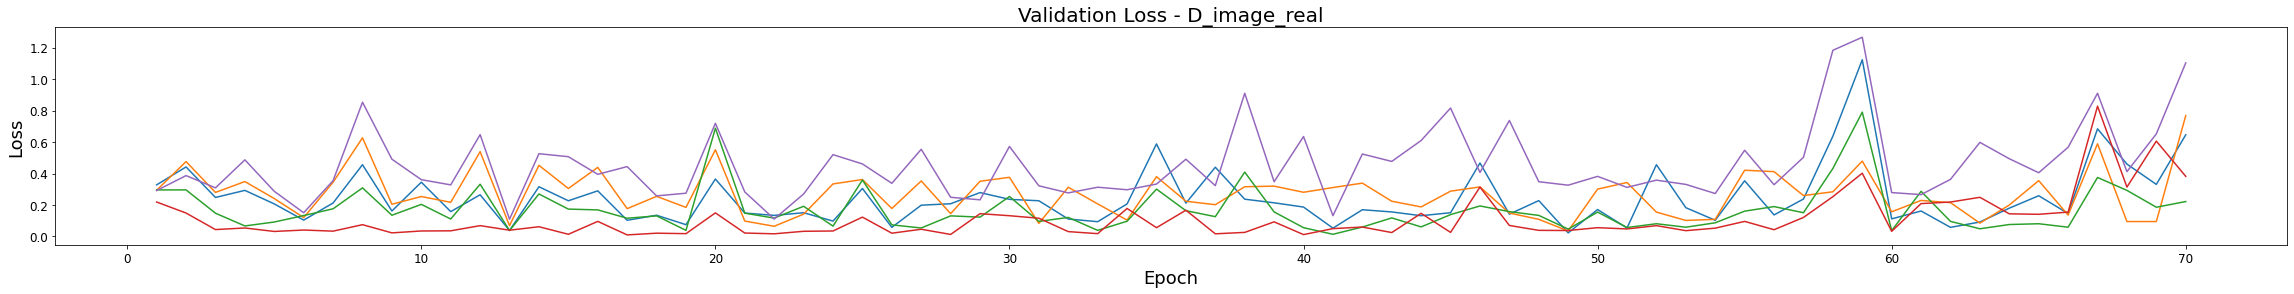

In [3250]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'D_image_real'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Loss',
       title='Validation Loss - ' + data_name)
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_validation_loss_" + data_name + ".png")
plt.show()

## D_person_fake loss plot  - VALIDATION

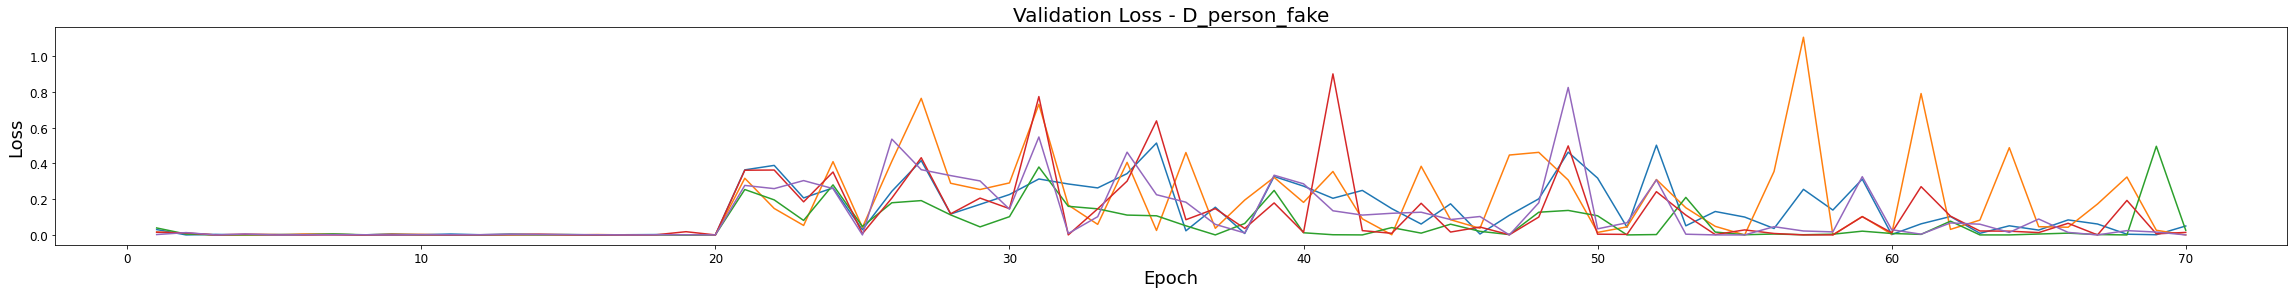

In [3251]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'D_person_fake'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Loss',
       title='Validation Loss - ' + data_name)
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_validation_loss_" + data_name + ".png")
plt.show()

## D_person_real loss plot - VALIDATION

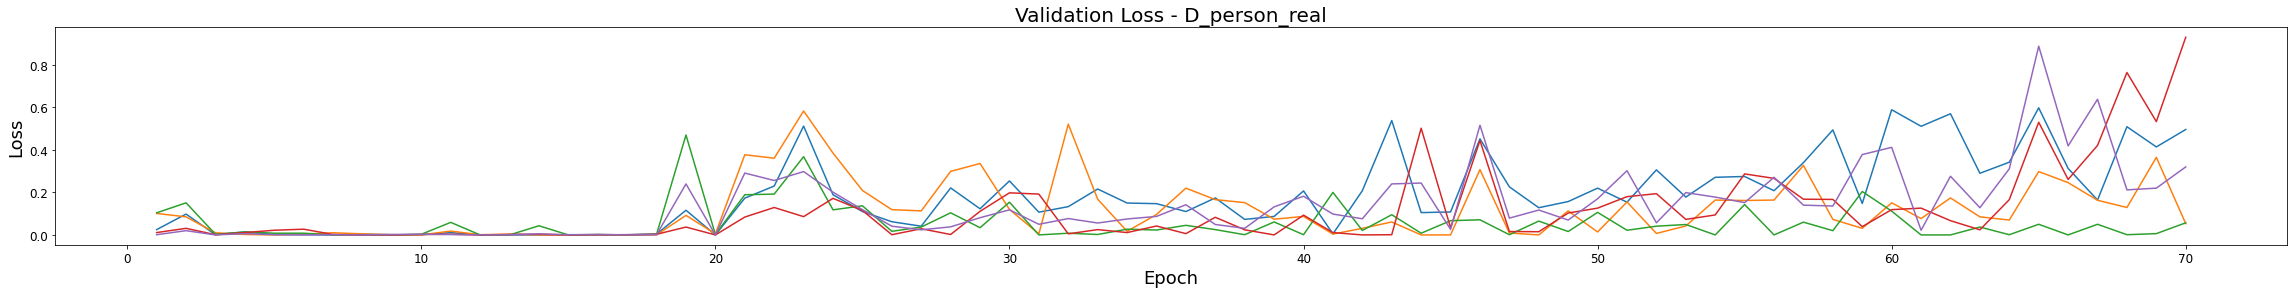

In [3252]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'D_person_real'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Loss',
       title='Validation Loss - ' + data_name)
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_validation_loss_" + data_name + ".png")
plt.show()

---
---
## Accuracy Plot - D Image Fake - VALIDATION

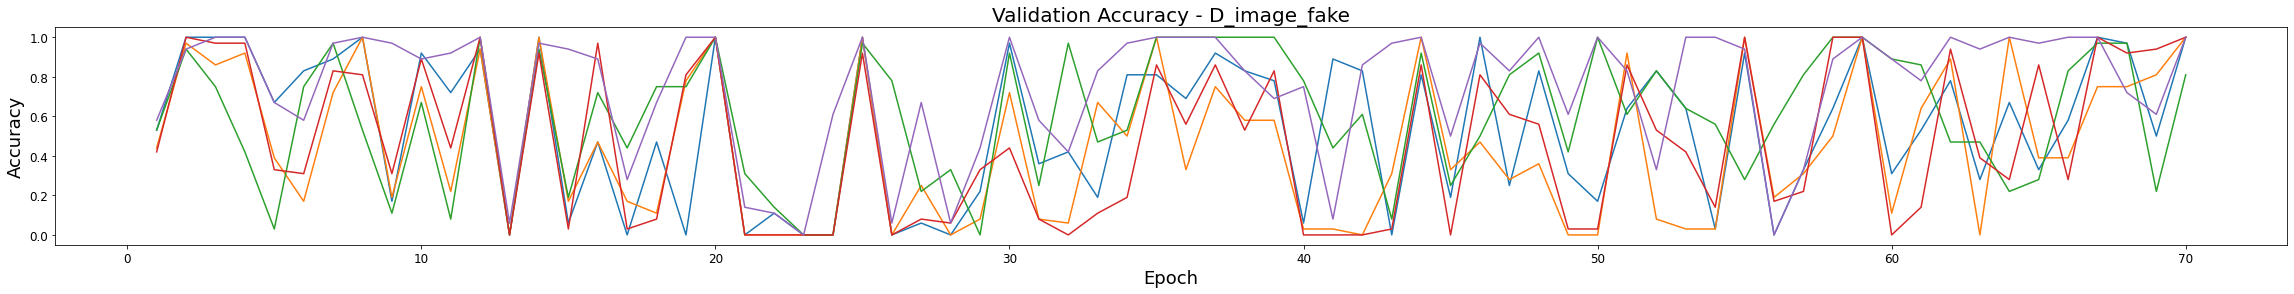

In [3253]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'acc_D_image_fake'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Accuracy',
       title='Validation Accuracy - ' + data_name[4:])
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_validation_" + data_name + ".png")
plt.show()

## Accuracy Plot - D Image Real - VALIDATION

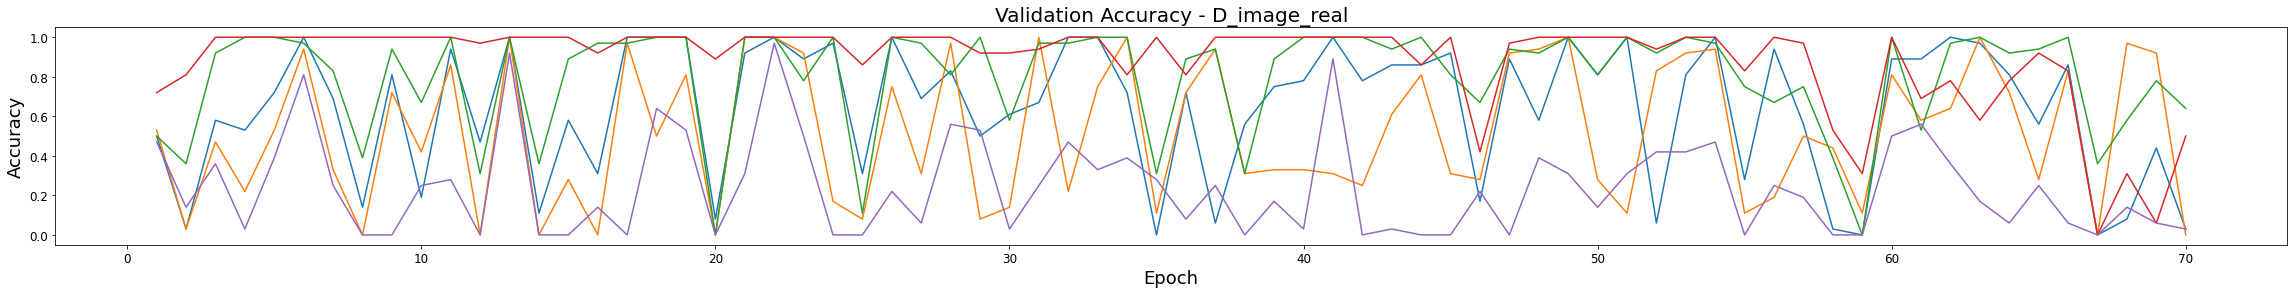

In [3254]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'acc_D_image_real'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Accuracy',
       title='Validation Accuracy - ' + data_name[4:])
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_validation_" + data_name + ".png")
plt.show()

## Accuracy Plot - D Person Fake - VALIDATION

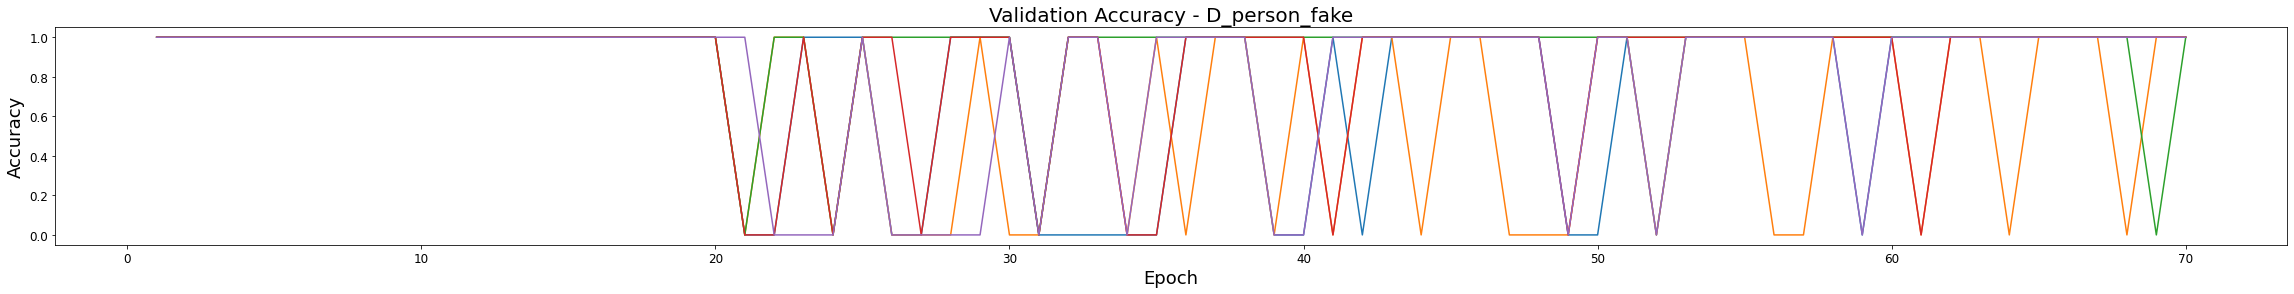

In [3255]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'acc_D_person_fake'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Accuracy',
       title='Validation Accuracy - ' + data_name[4:])
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_validation_" + data_name + ".png")
plt.show()

## Accuracy Plot - D Person Real - VALIDATION

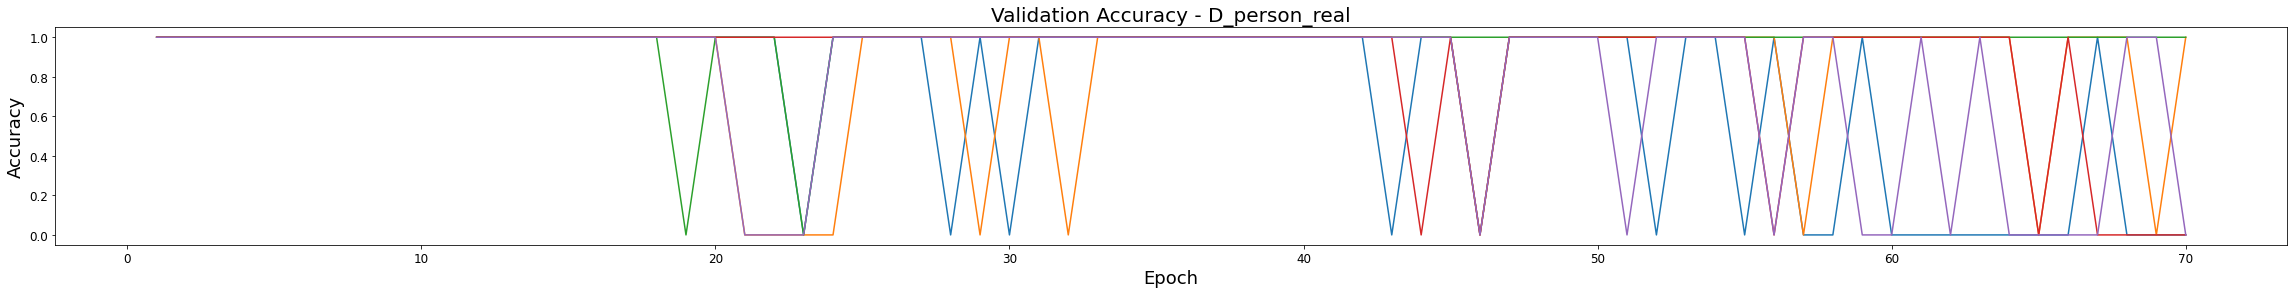

In [3256]:
# Data for plotting
x = sorted(val_log_dict['epoch'])
data_name = 'acc_D_person_real'
y0 = val_log_dict[data_name][0]
y1 = val_log_dict[data_name][1]
y2 = val_log_dict[data_name][2]
y3 = val_log_dict[data_name][3]
y4 = val_log_dict[data_name][4]

fig, ax = plt.subplots()
ax.plot(x, y0, label = "img0")
ax.plot(x, y1, label = "img1")
ax.plot(x, y2, label = "img2")
ax.plot(x, y3, label = "img3")
ax.plot(x, y4, label = "img4")

ax.set(xlabel='Epoch', ylabel='Accuracy',
       title='Validation Accuracy - ' + data_name[4:])
# plt.ylim(0, 2)
if SAVE:
    fig.savefig(log_dir +'/'+ log_dir + "_validation_" + data_name + ".png")
plt.show()

---
## Dep

## Gradients - original version (outer layer only)

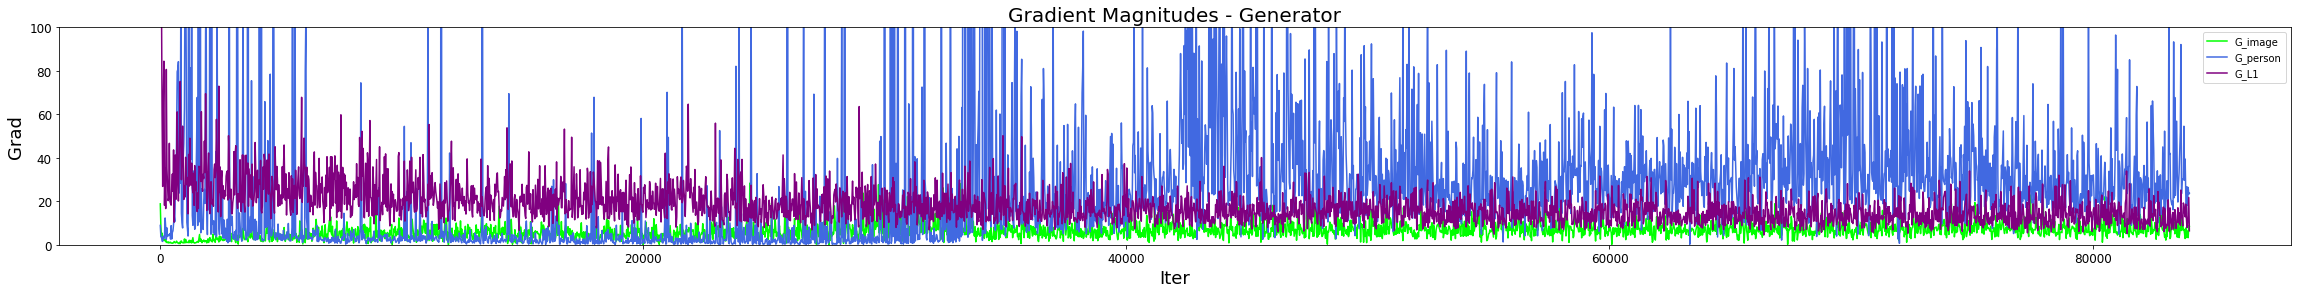

In [2470]:
try:
    # Data for plotting
    x = log_dict['iters']
    # data_name = 'grad_G_image', 'grad_G_person', 'grad_G_L1', 'grad_G', 'grad_G_clip'
    y0 = log_dict['grad_G_image']
    y1 = log_dict['grad_G_person']
    y2 = log_dict['grad_G_L1']

    fig, ax = plt.subplots()
    ax.plot(x, y0, label = "G_image", color='lime')
    ax.plot(x, y1, label = "G_person", color='royalblue')
    ax.plot(x, y2, label = "G_L1", color='purple')

    ax.set(xlabel='Iter', ylabel='Grad',
           title='Gradient Magnitudes - Generator')
    plt.ylim(0, 100)
    plt.legend()
    if SAVE:
        fig.savefig(log_dir +'/'+ log_dir + "_generator_gradients" + ".png")
    plt.show()
    
except:
    pass

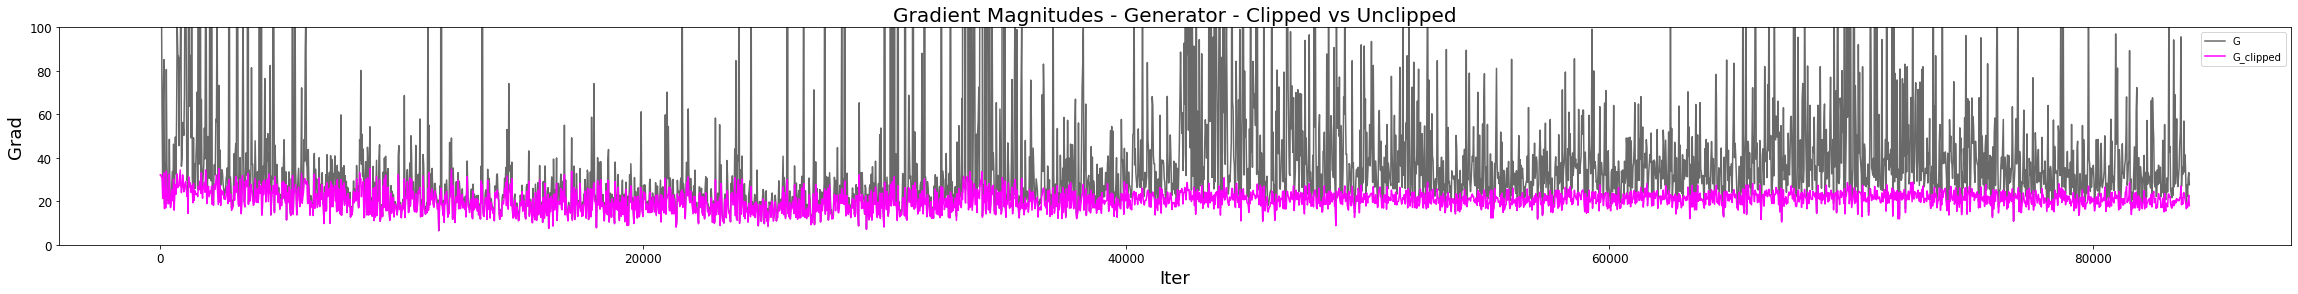

In [2471]:
try:
    # Data for plotting
    x = log_dict['iters']# data_name = 'grad_G_image', 'grad_G_person', 'grad_G_L1', 'grad_G', 'grad_G_clip'
    y0 = log_dict['grad_G']
    y1 = log_dict['grad_G_clip']

    fig, ax = plt.subplots()
    ax.plot(x, y0, label = "G", color='dimgrey')
    ax.plot(x, y1, label = "G_clipped", color='magenta')

    ax.set(xlabel='Iter', ylabel='Grad',
           title='Gradient Magnitudes - Generator - Clipped vs Unclipped')
    plt.ylim(0, 100)
    plt.legend()
    if SAVE:
        fig.savefig(log_dir +'/'+ log_dir + "_generator_gradients_clip" + ".png")
    plt.show()
    
except:
    pass